In [1]:
from dataframe import *

In [ ]:
# A class that inherits from the base class:
# It is specialized:
class pyDataFrame(dfb.pyDF):
    """
    A specialized class that inherits from pyDF:
    The datastructure is converted from a python list
    to a dataframe (pandas) for enhancing flexibility.
    """
    def __init__(self,config_file : str):
        dfb.pyDF.__init__(self,config_file);

    def read(self,filename :str, has_header : True):
        """
        Method for reading a csv file

        :param (str) filename: The name of the filename to read
        :param (bool) has_header: Flag for skipping first row
        :return: nothing
        """
        dfb.pyDF.read(self,filename,has_header);
        #Convert to a pandas dataframe for speed:
        self.data = pd.DataFrame(self.data());
        
        #Renaming the columns
        self.data.columns=["date","cloud_cover","sunshine","global_radiation","max_temp","mean_temp",
                           "min_temp","precipitation","pressure","snow_depth"];
        
    def convertToDate(self,column = "date",format_='%Y%m%d'):
        """
        Method for converting a column to a time-series.

        :param  (str) column : The column which is transformed to a date
        :param  (str) format: Format of the time-series
        """
        self.data[column] = pd.to_datetime(self.data[column],format=format_);
        self.data.set_index('date');
        
    def Year_statistics(self,column="mean_temp"):
        """
        Method for statistics in the whole years

        :param (str) column: The column we want to do statistics
        """
        self.data.groupby(self.data["date"].dt.year)[column].mean().plot(
            kind='bar');
     
        plt.xlabel("Years");
        plt.ylabel(column + " over the year");
        plt.show();

    
    
    def Month_statistics(self,column="mean_temp",year="2010"):
        """
        Method for statistics in a specific year

        :param (str) column: The column we want to do statistics
        :param (str) year:   The year for which we make statistics
        """
        mask = self.data['date'].dt.year == int(year);
        year_data = self.data[mask];
        
        self.data.groupby(year_data["date"].dt.month)[column].mean().plot(
            kind='bar');
        plt.xticks(ticks=range(0,12),labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]);
        plt.xlabel("months");
        plt.ylabel(column + " for the year "+str(year));
        plt.show();

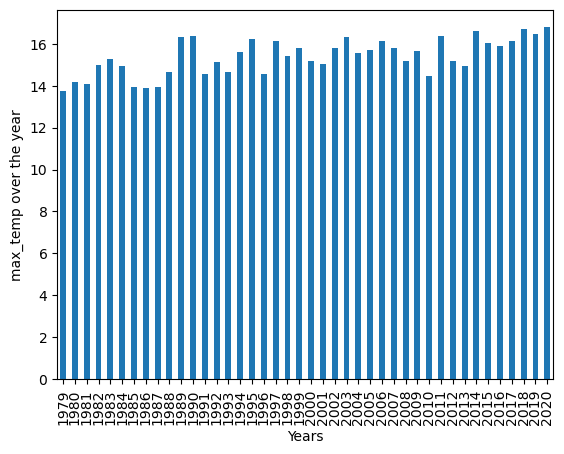

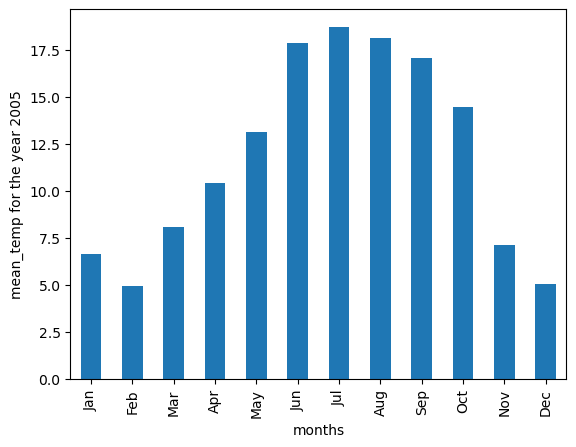

In [2]:
# Creating the object: reading the configuration file:
df=pyDataFrame("configCSV.txt");
# Specify the csv file:
df.read("London_weather.csv",True);
# Convert to date a specific column (default first)
df.convertToDate();

# Perform statistics in a whole year:
df.Year_statistics(column="max_temp");
df.Month_statistics(column="mean_temp",year="2005");